# Perception of begin old

Analysis of a dataset taken from https://github.com/tomeru/sideProjects/tree/master/feelingOld, data collected by Tomer Ullman

...

### import modules

In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### load data

In [32]:
dataset = '../data/feelingOld.csv'

In [33]:
dataset

'../data/feelingOld.csv'

### ...

In [34]:
age_df = pd.read_csv('../data/feelingOld.csv')
age_df.tail()


,Consent,ageFeel,oldBegin,oldReally,age,gender,numChild
190,"Yes, I am at least 18 years of age, have read ...",5,50,80,23,female,1
191,"Yes, I am at least 18 years of age, have read ...",4,50,60,49,male,2
192,"Yes, I am at least 18 years of age, have read ...",3,70,100,55,female,5
193,"Yes, I am at least 18 years of age, have read ...",5,69,80,69,male,3
194,"Yes, I am at least 18 years of age, have read ...",5,40,60,41,male,0


In [35]:
age_df.describe()

,ageFeel,oldBegin,oldReally,age,numChild
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,4.025641,48.128205,67.887179,36.805128,0.933333
std,1.237040,12.600891,14.348303,12.116402,1.188721
min,1.000000,20.000000,18.000000,20.000000,0.000000
25%,3.000000,40.000000,60.000000,28.000000,0.000000
50%,4.000000,50.000000,70.000000,33.000000,0.000000
75%,5.000000,60.000000,80.000000,43.500000,2.000000
max,7.000000,80.000000,112.000000,79.000000,5.000000


In [36]:
age_df.Consent.unique()

array(['Yes, I am at least 18 years of age, have read and understand the explanation provided to me and voluntarily agree to participate in this survey.'],
      dtype=object)

In [37]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_color_codes('muted')

age_df.gender.unique()

index = 0
for gen in age_df.gender:
    if len(gen) < 6:
        age_df.gender[index] = 'male'
    else:
        age_df.gender[index] = 'female'
    index += 1
    
age_df.gender.unique()      

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


array(['female', 'male'], dtype=object)

In [38]:
is_female = age_df.loc[:,'gender']=='female'

In [39]:
is_female.shape
is_female.sum()
(is_female==True).sum()
(is_female==False).sum()
is_female.mean()
is_female.mean? #Hilfe zur Funktion
is_female.mean?? #code der Funktion

SyntaxError: invalid syntax (<ipython-input-39-25b9e8470ad9>, line 6)

In [ ]:
%%timeit
np.mean(is_female)

In [ ]:
%%timeit 
is_female.mean()

In [40]:
age_df.groupby('gender').describe().stack(0)

25%   50%   75%  count    max       mean   min        std
gender                                                                      
female age        29.0  36.0  50.5   74.0   75.0  39.378378  21.0  12.696351
       ageFeel     3.0   5.0   5.0   74.0    7.0   4.337838   1.0   1.252691
       numChild    0.0   1.0   2.0   74.0    5.0   1.364865   0.0   1.319758
       oldBegin   40.0  50.0  60.0   74.0   70.0  49.797297  26.0  13.231324
       oldReally  60.0  75.0  80.0   74.0  100.0  70.783784  26.0  14.695326
male   age        28.0  32.0  40.0  121.0   79.0  35.231405  20.0  11.519375
       ageFeel     3.0   4.0   5.0  121.0    7.0   3.834711   1.0   1.192666
       numChild    0.0   0.0   1.0  121.0    4.0   0.669421   0.0   1.019709
       oldBegin   40.0  45.0  55.0  121.0   80.0  47.107438  20.0  12.142077
       oldReally  60.0  70.0  75.0  121.0  112.0  66.115702  18.0  13.896756

In [41]:
age_df.groupby('gender').aggregate(['median','min','max'])

ageFeel         oldBegin         oldReally             age          \
        median min max   median min max    median min  max median min max   
gender                                                                      
female       5   1   7       50  26  70        75  26  100     36  21  75   
male         4   1   7       45  20  80        70  18  112     32  20  79   

       numChild          
         median min max  
gender                   
female        1   0   5  
male          0   0   4

#Scatterplot             


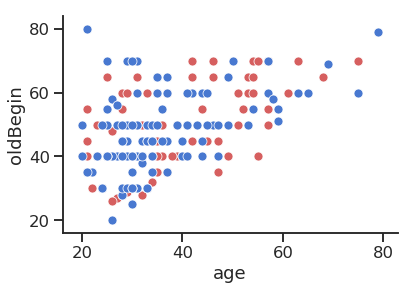

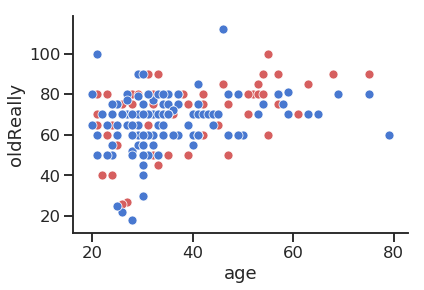

In [7]:
female = age_df[age_df.gender == 'female']
male = age_df[age_df.gender == 'male']

sns.scatterplot(data=female, x='age', y='oldBegin', color='r')
sns.scatterplot(data=male, x='age', y='oldBegin', color='b')
sns.despine()
plt.show()

sns.scatterplot(data=female, x='age', y='oldReally', color='r')
sns.scatterplot(data=male, x='age', y='oldReally', color='b')
sns.despine()
plt.show()

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


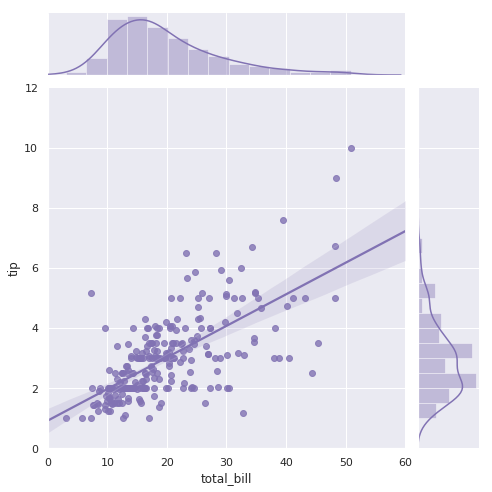

In [42]:
import seaborn as sns
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="m", height=7)

In [77]:
def plot_func(y):    
    g = g = sns.jointplot("age", "oldBegin", data=age_df, kind="reg",
                      xlim=(0, 100), ylim=(0, 100), color="m", height=7)

    plt.plot([0,100],[0,100],linestyle='dashed',color='k')

    # #input value
    # x = 40
    # #output value
    # y = alpha + beta * x

#     y = 40
    #output x = (y-alpha)/beta
    x = (y-alpha)/beta

    print('x=',round(x,), '\ny=', round(y,0))
    plt.plot(x, y, 'o', color = 'red', markerSize=10)


In [78]:
from ipywidgets import interact

In [79]:
interact(plot_func, y=(0,100))

interactive(children=(IntSlider(value=50, description='y'), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_func(y)>

# Lineare Regression

y = alpha + beta *x

In [58]:
from scipy import stats

In [59]:
x = age_df.loc[:,'age']
y = age_df.loc[:,'oldBegin']

In [60]:
regress_results = stats.linregress(x,y)

In [61]:
beta, alpha, rvalue, pvalue, stderr = regress_results

In [55]:
slope

0.5361851416240945

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


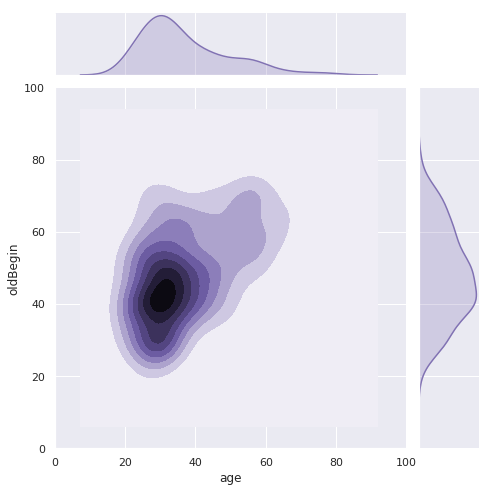

In [45]:
g = g = sns.jointplot("age", "oldBegin", data=age_df, kind="kde",
                  xlim=(0, 100), ylim=(0, 100), color="m", height=7)

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


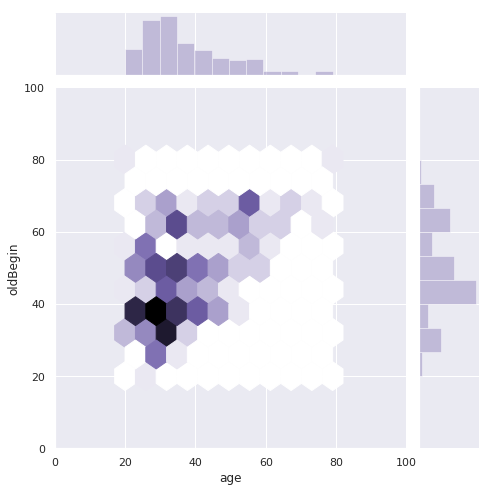

In [46]:
g = g = sns.jointplot("age", "oldBegin", data=age_df, kind="hex",
                  xlim=(0, 100), ylim=(0, 100), color="m", height=7)

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


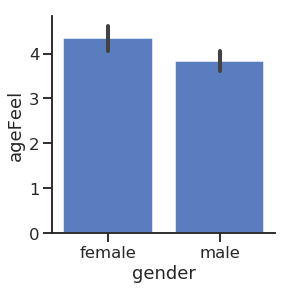

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
sns.barplot(x="gender", y='ageFeel', data=age_df, ax=ax, color="b")
sns.despine()
plt.show()

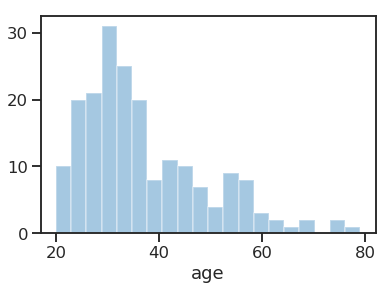

In [86]:
sns.distplot( age_df.loc[:,'age'],kde=False,bins=20)

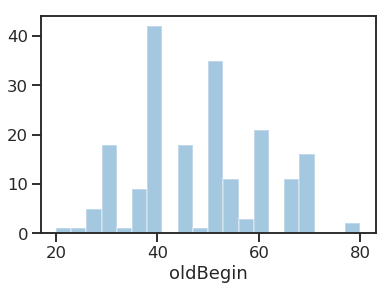

In [87]:
sns.distplot( age_df.loc[:,'oldBegin'],kde=False,bins=20)

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


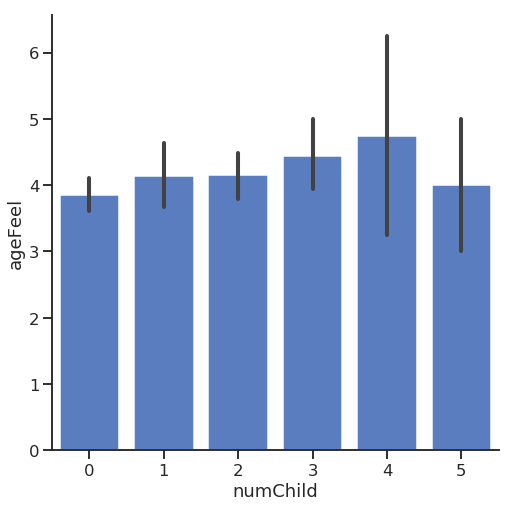

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
hist()
sns.despine()
plt.show()

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


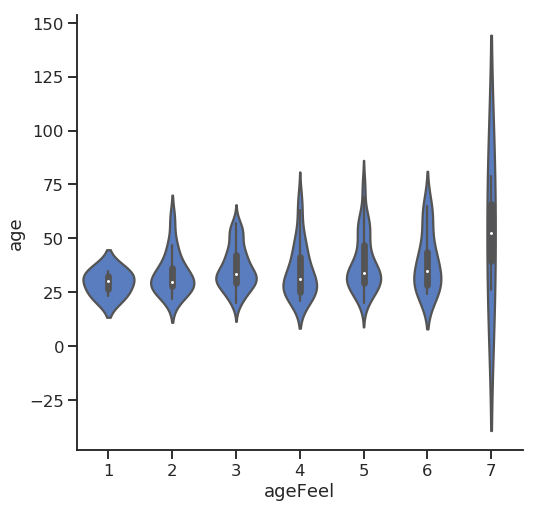

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.violinplot(x="ageFeel", y='age', data=age_df, ax=ax, color="b")
sns.despine()
plt.show()